In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


import cv2

In [3]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    displot = fig.add_subplot(111)
    displot.imshow(img, cmap='gray')

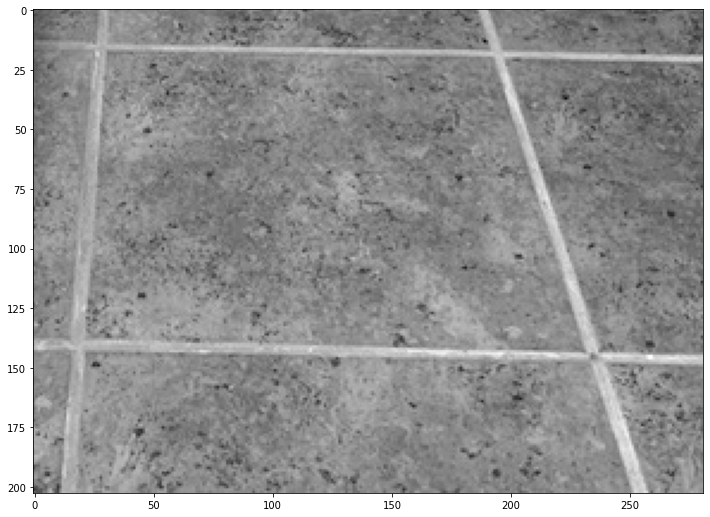

In [18]:
tile = cv2.imread('tile.jpeg', 0)
display(tile)

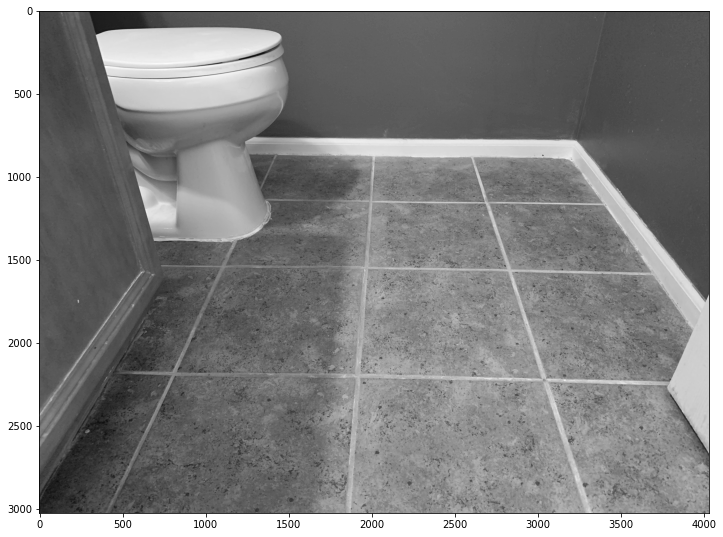

In [16]:
bathroom = cv2.imread('bathroom_image.jpeg',0)
display(bathroom)

In [19]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(tile,None)
kp2, des2 = orb.detectAndCompute(bathroom,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x:x.distance)
floor_matches = cv2.drawMatches(tile, kp1, bathroom, kp2, matches[:50], None, flags=2)

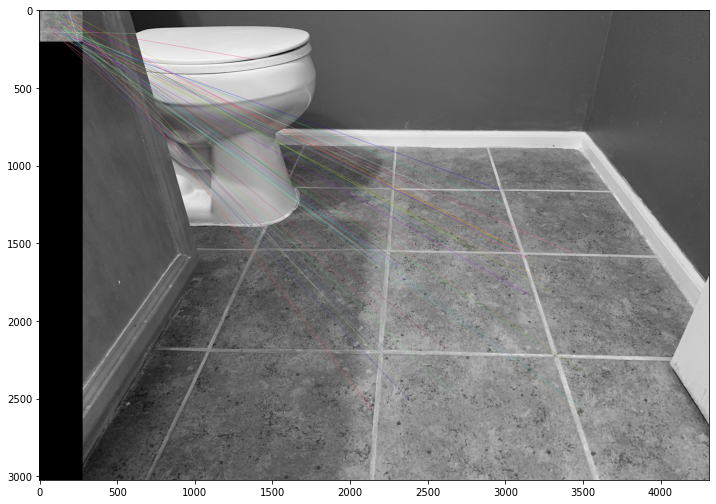

In [20]:
display(floor_matches)

In [21]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(tile,None)
kp2, des2 = sift.detectAndCompute(bathroom,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good = []
for match1, match2 in matches:
    if match1.distance < 1.2*match2.distance:
        good.append([match1])
        
draw_params = dict(matchColor=(0,0,255), singlePointColor=(0,0,255))
sift_matches = cv2.drawMatchesKnn(tile, kp1, bathroom, kp2, good, None, **draw_params)

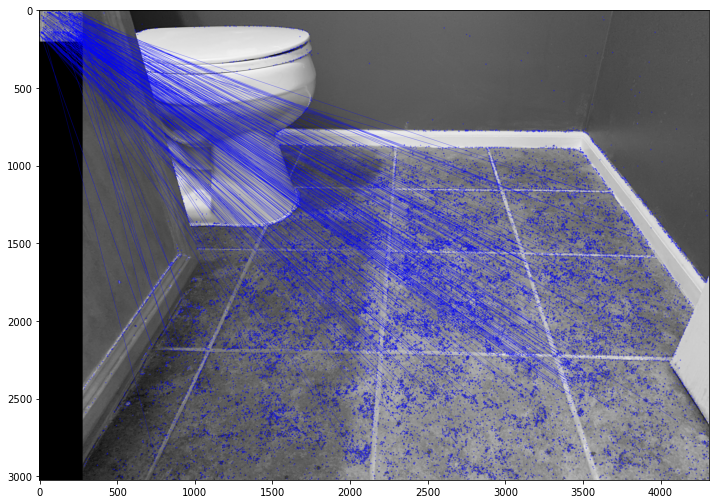

In [22]:
display(sift_matches)

In [25]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(tile,None)
kp2, des2 = sift.detectAndCompute(bathroom,None)

flann_index_kdtree=0
index_params = dict(algorithm = flann_index_kdtree, trees=7)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)
matchesMask = [[0,0] for i in range(len(matches))]

for i, (match1,match2) in enumerate(matches):
    if match1.distance < 1.2*match2.distance:
        matchesMask[i]=[1,0]
        
draw_params = dict(matchColor=(255,0,0), singlePointColor=(0,0,255), 
                   matchesMask=matchesMask, flags=2)

flann_matches = cv2.drawMatchesKnn(tile, kp1, bathroom, kp2, matches, None, **draw_params)

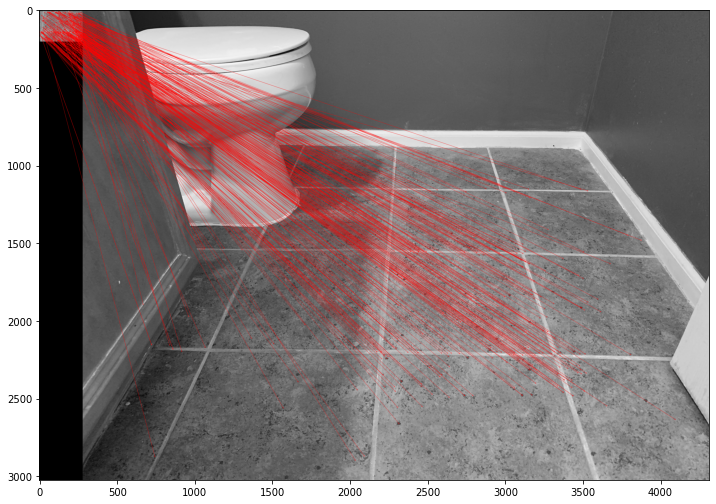

In [26]:
display(flann_matches)